In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [159]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [160]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data process

In [62]:
data.shape

(7920, 3)

In [63]:
data.duplicated

<bound method DataFrame.duplicated of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [161]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [162]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

###remove links

In [163]:
import re

data['tweet'] = data['tweet'].apply(
    lambda x: " ".join(
        word.lower() for word in re.sub(r"http\S+|www\S+|https\S+", '', x).split()
    )
)


In [164]:
data["tweet"].head(5)


0    #fingerprint #pregnancy test #android #apps #b...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [68]:
#Remove punctuation

In [165]:
import re
import string

data['tweet'] = data['tweet'].apply(
    lambda x: " ".join(
        re.sub(f"[{re.escape(string.punctuation)}]", "", word.lower())
        for word in re.sub(r"http\S+|www\S+|https\S+", "", x).split()
    )
)


In [166]:
import re
import string

In [71]:
#remove numbers

In [167]:
data['tweet'] = data['tweet'].apply(
    lambda x: " ".join(
        re.sub(r"[0-9]+", "",  # remove numbers
               re.sub(f"[{re.escape(string.punctuation)}]", "", word.lower()))  
        for word in re.sub(r"http\S+|www\S+|https\S+", "", x).split()
    )
)

remove stop words

In [168]:
!pip install nltk

In [169]:
import nltk

In [170]:
nltk.download('stopwords' , download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [171]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [76]:
sw


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [77]:
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in sw)
)


In [78]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [79]:
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(word for word in x.split() if word.lower() not in sw)
)


In [80]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [172]:
from nltk.stem import PorterStemmer

# Create an object of PorterStemmer
ps = PorterStemmer()


In [173]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [174]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final a transpar silicon case thank to my uncl...
2    we love thi would you go talk makememori unplu...
3    im wire i know im georg i wa made that way iph...
4    what amaz servic appl wont even talk to me abo...
Name: tweet, dtype: object

In [84]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


building vocabulary


In [175]:
from collections import Counter
vocab = Counter()

In [176]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [177]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'my': 2273,
         'i': 2033,
         'the': 2008,
         'to': 1870,
         'samsung': 1395,
         'a': 1390,
         'and': 1255,
         'it': 1243,
         'new': 1137,
         'for': 1083,
         'phone': 1015,
         'me': 1000,
         'you': 958,
         'is': 894,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'on': 734,
         'of': 723,
         'in': 707,
         'thi': 678,
         'with': 602,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'so': 482,
         'have': 470,
         'like': 456,
         'just': 440,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'your': 399,
         'photo': 394,
         'at': 393,
         'now': 389,
         'that': 383,
         'get': 383,
         'io': 383,
         'all': 367,
         'galaxi': 361,
         's': 359,
         'an': 359,
         '

In [178]:
tokens = [key for key in vocab if vocab[key] > 10]

In [179]:
len(tokens)

1250

In [180]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabilary.txt')

divide data set

In [181]:
X = data['tweet']
y = data['label']

In [182]:
!pip install scikit-learn

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [184]:
X_train

2       we love thi would you go talk makememori unplu...
6925    an iphon is the the onli appl product ill ever...
7692    friday everyon come and listen to my podcast o...
4938    christma eve famili tag like me sushi swag xma...
3650    birthday present from best friend stitch phone...
                              ...                        
3164    hi and her live wallpap bubbl samsung note s l...
3705    photo bepopular cute romant hubbi iphon cute t...
3258    iphon doesnt support panorama… figur it also d...
4219    had to get the appl made case for my iphon loy...
4502    even at home you can get fit nikk train iphon ...
Name: tweet, Length: 6336, dtype: object

In [185]:
X_test

6259    are you readi callofduti boi cod play playstat...
2804    love my new phone case iphon case disney stuff...
4721    i final got it in hand tmobil samsung galaxyno...
1522    yeay ipad appl white gorgeou nice applestor fl...
253     good morn everyon jam nike iphon appl s goodmo...
                              ...                        
1582    goofi gym appl iphon fit russia moscow nice do...
3618    happi as fuck disney disneyland magic fun me p...
2302    samsung car adapt avail at our store caradapt ...
1956    plant vs zombi it’ about time … андроид androi...
7308    amaz night at klaverfabrikken amaz beauti cope...
Name: tweet, Length: 1584, dtype: object

In [186]:
y_train.value_counts()

label
0    4724
1    1612
Name: count, dtype: int64

In [187]:
y_train

2       0
6925    1
7692    0
4938    0
3650    0
       ..
3164    0
3705    0
3258    1
4219    0
4502    0
Name: label, Length: 6336, dtype: int64

##Vectorization

In [188]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        words = sentence.split()
        for i, vocab_word in enumerate(vocabulary):
            if vocab_word in words:
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)

    return np.asarray(vectorized_lst, dtype=np.float32)


In [189]:
vectorized_x_train = vectorizer(X_train, vocab)
vectorized_x_test = vectorizer(X_test, vocab)

print(vectorized_x_train.shape, len(y_train))  # must match in first dimension


(6336, 15990) 6336


In [101]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 15896), dtype=float32)

##handle imbalanced dataset

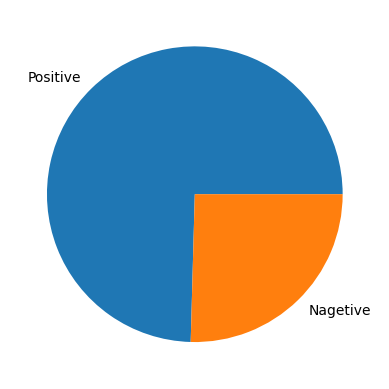

In [190]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Nagetive'])
plt.show()

In [191]:
pip install --upgrade imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [192]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

print(vectorized_x_train_smote.shape, y_train_smote.shape)


(9448, 15990) (9448,)


In [105]:
y_train_smote.value_counts()

label
0    4743
1    4743
Name: count, dtype: int64

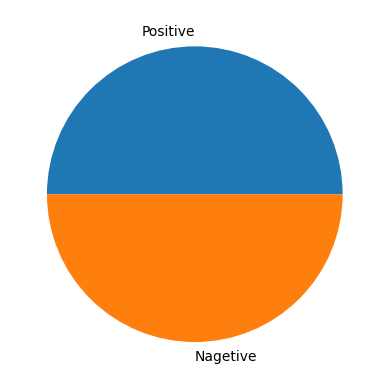

In [193]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Nagetive'])
plt.show()

Model Training  and Evaluation

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [195]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


Logistic Regression

In [196]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote , y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [197]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [198]:
y_train_pred

array([0, 1, 0, ..., 1, 1, 1], shape=(9448,))

In [199]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.981
	Precision = 0.968
	Recall = 0.995
	F1-Score = 0.982


In [200]:
y_test_pred = lr.predict(vectorized_x_train)

In [201]:
y_test_pred

array([0, 1, 0, ..., 1, 0, 0], shape=(6336,))

In [202]:
y_test_pred = (y_test_pred > 0.5).astype(int)

In [203]:
model = LogisticRegression()
model.fit(vectorized_x_train_smote, y_train_smote)
y_test_pred = model.predict(vectorized_x_test)



In [204]:
validation_scores(y_test , y_test_pred)

Testing Scores:
	Accuracy = 0.898
	Precision = 0.792
	Recall = 0.829
	F1-Score = 0.81


Naive Base

In [205]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 0.93
	Precision = 0.88
	Recall = 0.995
	F1-Score = 0.934
Testing Scores:
	Accuracy = 0.898
	Precision = 0.792
	Recall = 0.829
	F1-Score = 0.81


Decision Tree

In [206]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.898
	Precision = 0.792
	Recall = 0.829
	F1-Score = 0.81


Random Forest Classifier

In [208]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.898
	Precision = 0.792
	Recall = 0.829
	F1-Score = 0.81


Support Vector Machine

In [209]:
svm = SVC()
svm.fit(vectorized_x_train_smote , y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 0.989
	Precision = 0.98
	Recall = 0.999
	F1-Score = 0.989
Testing Scores:
	Accuracy = 0.898
	Precision = 0.792
	Recall = 0.829
	F1-Score = 0.81


In [212]:
import pickle

with open('../static/model,pickle' , 'wb') as file:
    pickle.dump(lr, file)